In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cat-and-dog:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F23777%2F30378%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240427%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240427T101226Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4c32365a1c8b1aadf63051c6081d465b38b68776f87d027473089f58b6051fb1761a773c5066794bcef3da7f66d3e353ce90a8c4d0d03fc2ca87aff43441f6547ce1f95dca60cacd034bf5b3996ca85afddecb792e81cf92e9e80205a900aa55c99fc219a749762776775033e9f645e6dd052c27157e7e94879b244863b7df159a7ed22183acf0edc33c4f49c8bcbb4cd2ea23a43d6be6d647bf6734439c6ae061762a9beb119d947021d41d4df829bf1cc06db89d8452c0933cb26cb93a46449cf31a0de14849f29039308c93f905f537df6d38649522dd7bb92fd846242bd2a86214e1d9ade04eba5d5803a6ed711cfeb58a159620b42ebc8ce6e93b0581f4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 228487605 bytes downloaded
Downloaded and uncompressed: cat-and-dog
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#         for filename in filenames:
#             print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

![image.png](attachment:204755c2-a45b-4284-8b5b-6a8687d31607.png)

In [ ]:
import PIL
print('Pillow Version:', PIL.__version__)

from PIL import Image

Pillow Version: 9.4.0


uint8
(449, 432, 3)


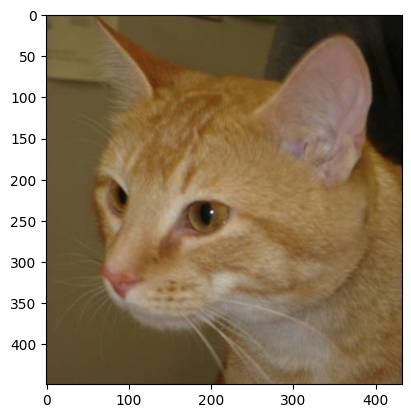

In [ ]:
from matplotlib import image
from matplotlib import pyplot
data = image.imread('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3664.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

### Typical steps for loading custom dataset for Deep Learning Models
* Open the image file. The format of the file can be JPEG, PNG, BMP, etc.
* Resize the image to match the input size for the Input layer of the Deep Learning model.
* Convert the image pixels to float datatype.
* Normalize the image to have pixel values scaled down between 0 and 1 from 0 to 255.
* Image data for Deep Learning models should be either a numpy array or a tensor object.

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

(276, 374, 3)
(477, 499, 3)
(374, 500, 3)
(303, 317, 3)
(480, 458, 3)


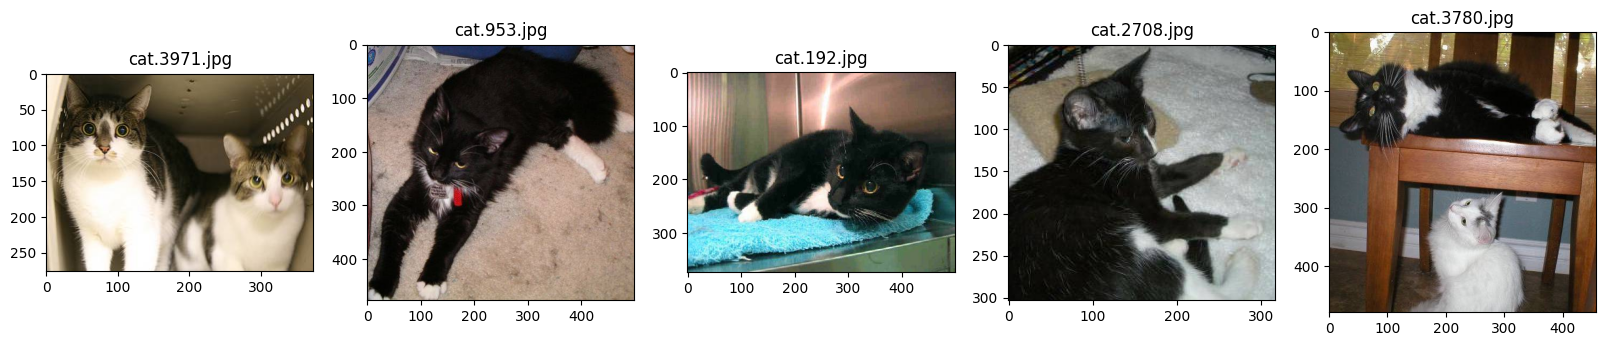

In [ ]:
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/cat-and-dog/training_set/training_set/cats'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    print(img.shape)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/cat-and-dog/training_set/training_set/dogs'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

## **Data Ingestion**
now we need to create a function which takes goes into our directory, goes into the folders and transforms our images into a dataframe of required shape and size for keras to work its magic on

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder='/kaggle/input/cat-and-dog/training_set/training_set/'

def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]

    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            try:
                image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            except:
                break
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset('/kaggle/input/cat-and-dog/training_set/training_set/')

In [ ]:
img_data=np.array(img_data)
class_name=np.array(class_name)
img_data.shape

(2225, 200, 200, 3)

In [ ]:
def dog_cat_mapping(a):
    if a=="dogs":
        return 1
    else:return 0
class_name=list(map(dog_cat_mapping,class_name))
class_name=np.array(class_name)

In [ ]:
input_shape=img_data.shape[1:]
input_shape

(200, 200, 3)

In [ ]:
def model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
    model=Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
    model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [ ]:
model=model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x=img_data,y=class_name, epochs=10)

Epoch 1/10
70/70 [==============================] - 945s 13s/step - loss: 2.5585 - accuracy: 0.4998
Epoch 2/10
70/70 [==============================] - 979s 14s/step - loss: 0.6910 - accuracy: 0.5335
Epoch 3/10
70/70 [==============================] - 955s 14s/step - loss: 0.6853 - accuracy: 0.5667
Epoch 4/10
70/70 [==============================] - 952s 14s/step - loss: 0.6797 - accuracy: 0.6225
Epoch 5/10
70/70 [==============================] - 951s 14s/step - loss: 0.5983 - accuracy: 0.6742
Epoch 6/10
70/70 [==============================] - 958s 14s/step - loss: 0.4413 - accuracy: 0.7987
Epoch 7/10
70/70 [==============================] - 943s 13s/step - loss: 0.2065 - accuracy: 0.9137
Epoch 8/10
70/70 [==============================] - 959s 14s/step - loss: 0.0862 - accuracy: 0.9694
Epoch 9/10
70/70 [==============================] - 943s 13s/step - loss: 0.0500 - accuracy: 0.9879
Epoch 10/10
70/70 [==============================] - 954s 14s/step - loss: 0.0190 - accuracy: 0.9955

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder='/kaggle/input/cat-and-dog/test_set/test_set/'


# extract the image array and class name
img_data_test, class_name_test =create_dataset('/kaggle/input/cat-and-dog/test_set/test_set/')

In [ ]:
img_data_test=np.array(img_data_test)
class_name_test=list(map(dog_cat_mapping,class_name_test))
class_name_test=np.array(class_name_test)

In [ ]:
preds=model.predict(img_data_test).round().astype(int)

18/18 [==============================] - 59s 3s/step


In [ ]:
flat_pred = [item for sublist in preds for item in sublist]
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(class_name_test, flat_pred)
print("The Accuracy is: %2f" % accuracy)

The Accuracy is: 0.581560


In [ ]:
model.save_weights('model_wieghts_catdog.h5')
model.save('model_keras_catdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


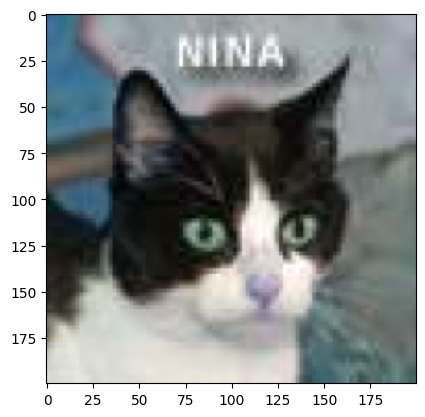

In [ ]:
plt.imshow(img_data_test[10])

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
pip install streamlit


In [ ]:
#model.save('/catdog')

# TODO:
#     Post the content on streamlit to create a web application
#     check for catdog
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Cargar el modelo pre-entrenado
model = tf.keras.models.load_model('model_keras_catdog.h5')

# Función para predecir la clase de la imagen cargada
def predict(image):
    img = Image.open(image)
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return prediction

# Configuración de la página
st.title('Clasificador de Perros y Gatos')
st.write('Carga una imagen y el modelo clasificará si es un perro o un gato.')

# Cargar la imagen
uploaded_file = st.file_uploader("Selecciona una imagen", type=["jpg", "jpeg", "png"])

# Hacer predicciones si se ha cargado una imagen
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Imagen cargada', use_column_width=True)
    prediction = predict(uploaded_file)
    if prediction > 0.5:
        st.write('¡Es un perro!')
    else:
        st.write('¡Es un gato!')


2024-04-27 13:33:11.887 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
